# Dependencies

In [1]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
library(openxlsx)

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"

gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

# Main

In [5]:
ffpe <- read.xlsx(paste0(datapath, "CHOP Lab Processing Log.xlsx"), sheet = 3)

In [6]:
metadata <- read.csv(file = paste0(datapath, "INT_metadata_flow.csv"),header = T, stringsAsFactors = F)

In [8]:
# divstats <- read.csv(paste0(datapath, "capTCRseq/divstats_TRBCHP.csv"), header = T, stringsAsFactors = F, row.names = 1)

# FFPE

In [15]:
# get batch 1
ffpe <- ffpe[ ffpe$Batch == "1",]

In [16]:
#make a dataframe from sample ids
ffpe_samples <- data.frame(ffpe$Pugh.Lab.ID, stringsAsFactors = F)
colnames(ffpe_samples) <- "sample_id"

In [17]:
# add number of samples
ffpe_samples$Shipped <- paste0("n = ", nrow(ffpe_samples))

In [18]:
ffpe_samples

sample_id,Shipped
<chr>,<chr>
343-B,n = 25
344-A,n = 25
419,n = 25
358,n = 25
384,n = 25
401,n = 25
412,n = 25
404-A,n = 25
418,n = 25


In [19]:
#add amount DNA extracted
ffpe_samples$DNAextracted <- NA
ffpe_samples$DNAextracted <- ffpe$`DNA.total.(ng)`[ match(ffpe_samples$sample_id,ffpe$Pugh.Lab.ID)]

In [20]:
#add amount DNA used for library
ffpe_samples$DNAused <- NA
ffpe_samples$DNAused <- ffpe$`Amount.of.DNA.used.for.Library.Prep.(ng)`[ match(ffpe_samples$sample_id, ffpe$Pugh.Lab.ID )]

In [21]:
# Add miseq status for libraries
ffpe_samples$librarypassed <- NA
ffpe_samples$librarypassed <- trimws(ffpe$Miseq.for.Library[ match(ffpe_samples$sample_id, ffpe$Pugh.Lab.ID)])

In [22]:
ffpe_samples

sample_id,Shipped,DNAextracted,DNAused,librarypassed
<chr>,<chr>,<dbl>,<dbl>,<chr>
343-B,n = 25,1060,500,Passed
344-A,n = 25,9280,500,Passed
419,n = 25,248,248,Passed
358,n = 25,11900,500,Passed
384,n = 25,2460,500,Passed
401,n = 25,1740,500,Passed
412,n = 25,3060,500,Passed
404-A,n = 25,1010,500,Passed
418,n = 25,3280,500,Passed


In [23]:
# add number of passed libraries
ffpe_samples$Library <- NA
ffpe_samples$Library[ ffpe_samples$librarypassed == "Passed"] <- paste0("n = ", 
                               length(ffpe_samples$librarypassed[ffpe_samples$librarypassed == "Passed"]))

In [24]:
#add total library yield
ffpe_samples$libraryyield <- NA
ffpe_samples$libraryyield <- ffpe$`Total.Library.Yield.(ng)`[ match(ffpe_samples$sample_id, ffpe$Pugh.Lab.ID)]

In [25]:
#amount DNA used for capture
ffpe_samples$DNAforcapture <- NA
ffpe_samples$DNAforcapture <- ffpe$`Amount.of.Library.used.for.Capture.(ng)`[ match(ffpe_samples$sample_id, ffpe$Pugh.Lab.ID)]

In [26]:
#total capture yield
ffpe_samples$captureyield <- NA
ffpe_samples$captureyield <- ffpe$`Total.Capture.Library.Yield.(ng)`[ match(ffpe_samples$sample_id, ffpe$Pugh.Lab.ID)]

In [27]:
# Miseq status for capture
ffpe_samples$capturepassed <- NA
ffpe_samples$capturepassed <- trimws(ffpe$Miseq.for.Capture[ match(ffpe_samples$sample_id, ffpe$Pugh.Lab.ID)])

In [28]:
# Number of passed captures
ffpe_samples$Capture <- NA
ffpe_samples$Capture[ ffpe_samples$capturepassed == "Passed"] <- paste0("n = ", 
                                                                        length(ffpe_samples$capturepassed[ffpe_samples$capturepassed == "Passed"]))

In [29]:
ffpe_samples

sample_id,Shipped,DNAextracted,DNAused,librarypassed,Library,libraryyield,DNAforcapture,captureyield,capturepassed,Capture
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
343-B,n = 25,1060,500,Passed,n = 25,258.24,258.24,10.070,Passed,n = 23
344-A,n = 25,9280,500,Passed,n = 25,287.04,287.04,10.070,Passed,n = 23
419,n = 25,248,248,Passed,n = 25,237.12,237.12,10.070,Passed,n = 23
358,n = 25,11900,500,Passed,n = 25,638.40,617.26,83.220,Passed,n = 23
384,n = 25,2460,500,Passed,n = 25,363.84,363.84,83.220,Passed,n = 23
401,n = 25,1740,500,Passed,n = 25,705.60,449.48,10.108,Passed,n = 23
412,n = 25,3060,500,Passed,n = 25,787.20,550.52,10.108,Passed,n = 23
404-A,n = 25,1010,500,Passed,n = 25,811.20,498.41,42.560,Passed,n = 23
418,n = 25,3280,500,Passed,n = 25,792.00,501.59,42.560,Passed,n = 23


In [30]:
# whether submitted for deep seq
ffpe_samples$deepseq <- NA
ffpe_samples$deepseq <- trimws(ffpe$`Sent.for.Nextseq?`[ match(ffpe_samples$sample_id, ffpe$Pugh.Lab.ID)])
ffpe_samples$deepseq[is.na(ffpe_samples$deepseq)] <- "No"

In [31]:
sum(ffpe_samples$deepseq == "Yes")

[1] 21

In [32]:
# number of deep sequencing samples
ffpe_samples$Sequencing <- NA
ffpe_samples$Sequencing[ ffpe_samples$deepseq == "Yes"] <- paste0("n = ", sum(ffpe_samples$deepseq == "Yes"))

In [33]:
#make a new sample id to match with divstats
ffpe_samples$mysample_id <- paste0("CHP_", ffpe_samples$sample_id, sep = "")
ffpe_samples$mysample_id <- gsub("-", "_", ffpe_samples$mysample_id)

In [34]:
# Samples included in tcr analysis
ffpe_samples$TCR <- NA
ffpe_samples$TCR[ ffpe_samples$mysample_id %in% divstats$sample_id] <- "Yes"
ffpe_samples$TCR[ is.na(ffpe_samples$TCR)] <- "No"

In [35]:
ffpe_samples

sample_id,Shipped,DNAextracted,DNAused,librarypassed,Library,libraryyield,DNAforcapture,captureyield,capturepassed,Capture,deepseq,Sequencing,mysample_id,TCR
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
343-B,n = 25,1060,500,Passed,n = 25,258.24,258.24,10.070,Passed,n = 23,Yes,n = 21,CHP_343_B,No
344-A,n = 25,9280,500,Passed,n = 25,287.04,287.04,10.070,Passed,n = 23,Yes,n = 21,CHP_344_A,Yes
419,n = 25,248,248,Passed,n = 25,237.12,237.12,10.070,Passed,n = 23,Yes,n = 21,CHP_419,Yes
358,n = 25,11900,500,Passed,n = 25,638.40,617.26,83.220,Passed,n = 23,No,NA,CHP_358,No
384,n = 25,2460,500,Passed,n = 25,363.84,363.84,83.220,Passed,n = 23,No,NA,CHP_384,No
401,n = 25,1740,500,Passed,n = 25,705.60,449.48,10.108,Passed,n = 23,Yes,n = 21,CHP_401,Yes
412,n = 25,3060,500,Passed,n = 25,787.20,550.52,10.108,Passed,n = 23,Yes,n = 21,CHP_412,Yes
404-A,n = 25,1010,500,Passed,n = 25,811.20,498.41,42.560,Passed,n = 23,Yes,n = 21,CHP_404_A,Yes
418,n = 25,3280,500,Passed,n = 25,792.00,501.59,42.560,Passed,n = 23,Yes,n = 21,CHP_418,Yes


In [36]:
# Number of samples included in tcr analysis
ffpe_samples$TCRanalysis <- NA
ffpe_samples$TCRanalysis[ffpe_samples$TCR == "Yes"] <- paste0("n = ", sum(ffpe_samples$TCR == "Yes"))

In [37]:
head(ffpe_samples)

,sample_id,Shipped,DNAextracted,DNAused,librarypassed,Library,libraryyield,DNAforcapture,captureyield,capturepassed,Capture,deepseq,Sequencing,mysample_id,TCR,TCRanalysis
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,343-B,n = 25,1060,500,Passed,n = 25,258.24,258.24,10.070,Passed,n = 23,Yes,n = 21,CHP_343_B,No,NA
2,344-A,n = 25,9280,500,Passed,n = 25,287.04,287.04,10.070,Passed,n = 23,Yes,n = 21,CHP_344_A,Yes,n = 18
3,419,n = 25,248,248,Passed,n = 25,237.12,237.12,10.070,Passed,n = 23,Yes,n = 21,CHP_419,Yes,n = 18
4,358,n = 25,11900,500,Passed,n = 25,638.40,617.26,83.220,Passed,n = 23,No,NA,CHP_358,No,NA
5,384,n = 25,2460,500,Passed,n = 25,363.84,363.84,83.220,Passed,n = 23,No,NA,CHP_384,No,NA
6,401,n = 25,1740,500,Passed,n = 25,705.60,449.48,10.108,Passed,n = 23,Yes,n = 21,CHP_401,Yes,n = 18


In [38]:
# Number of failed captures
capturefailed <- sum(ffpe_samples$capturepassed == "Failed")
ffpe_samples$Capture[ffpe_samples$capturepassed == "Failed"] <- paste0("n = ", capturefailed)

In [39]:
# Number of samples not deep seq'd
seqfailed <- sum(ffpe_samples$deepseq == "No" & ffpe_samples$capturepassed == "Passed")
ffpe_samples$Sequencing[is.na(ffpe_samples$Sequencing)& 
                        ffpe_samples$capturepassed == "Passed"] <- paste0("n = ", seqfailed)

In [40]:
# Number of samples not included in TCR analysis
tcrfailed <- sum(ffpe_samples$TCR == "No" & 
                 ffpe_samples$deepseq == "Yes" &
                 ffpe_samples$capturepassed == "Passed")

ffpe_samples$TCRanalysis[ffpe_samples$TCR == "No" & 
                         ffpe_samples$deepseq == "Yes" &
                         ffpe_samples$capturepassed == "Passed"] <- paste0("n = ", tcrfailed)

In [41]:
# Create a patient ID
ffpe_samples$Patient <- gsub("_A", "", ffpe_samples$mysample_id)
ffpe_samples$Patient <- gsub("_B", "", ffpe_samples$Patient)

In [42]:
# add tumour type
ffpe_samples$Tumor <- NA
ffpe_samples$Tumor <- metadata$Disease_type[match(ffpe_samples$Patient, metadata$Patient)]

In [43]:
# add tumour group
ffpe_samples$Group <- NA
ffpe_samples$Group <- metadata$group[match(ffpe_samples$Patient, metadata$Patient)]

In [44]:
#remove tumor and group for samples not included in TCR analysis
ffpe_samples$Group[ ffpe_samples$TCR == "No"] <- NA
ffpe_samples$Tumor[ ffpe_samples$TCR == "No"] <- NA

In [45]:
ffpe_samples

sample_id,Shipped,DNAextracted,DNAused,librarypassed,Library,libraryyield,DNAforcapture,captureyield,capturepassed,Capture,deepseq,Sequencing,mysample_id,TCR,TCRanalysis,Patient,Tumor,Group
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
343-B,n = 25,1060,500,Passed,n = 25,258.24,258.24,10.070,Passed,n = 23,Yes,n = 21,CHP_343_B,No,n = 3,CHP_343,NA,NA
344-A,n = 25,9280,500,Passed,n = 25,287.04,287.04,10.070,Passed,n = 23,Yes,n = 21,CHP_344_A,Yes,n = 18,CHP_344,BL,NA
419,n = 25,248,248,Passed,n = 25,237.12,237.12,10.070,Passed,n = 23,Yes,n = 21,CHP_419,Yes,n = 18,CHP_419,OS,NA
358,n = 25,11900,500,Passed,n = 25,638.40,617.26,83.220,Passed,n = 23,No,n = 2,CHP_358,No,NA,CHP_358,NA,NA
384,n = 25,2460,500,Passed,n = 25,363.84,363.84,83.220,Passed,n = 23,No,n = 2,CHP_384,No,NA,CHP_384,NA,NA
401,n = 25,1740,500,Passed,n = 25,705.60,449.48,10.108,Passed,n = 23,Yes,n = 21,CHP_401,Yes,n = 18,CHP_401,ERMS,NA
412,n = 25,3060,500,Passed,n = 25,787.20,550.52,10.108,Passed,n = 23,Yes,n = 21,CHP_412,Yes,n = 18,CHP_412,BLL,NA
404-A,n = 25,1010,500,Passed,n = 25,811.20,498.41,42.560,Passed,n = 23,Yes,n = 21,CHP_404_A,Yes,n = 18,CHP_404,ERMS,NA
418,n = 25,3280,500,Passed,n = 25,792.00,501.59,42.560,Passed,n = 23,Yes,n = 21,CHP_418,Yes,n = 18,CHP_418,NB,NA


In [46]:
#some colname cleanup
colnames(ffpe_samples)[colnames(ffpe_samples) == "Library"] <- "Library preparation"
colnames(ffpe_samples)[colnames(ffpe_samples) == "Capture"] <- "Successful capture"
colnames(ffpe_samples)[colnames(ffpe_samples) == "Sequencing"] <- "Deep sequencing"
colnames(ffpe_samples)[colnames(ffpe_samples) == "TCRanalysis"] <- "TCR analysis"

In [47]:
save(ffpe_samples, file = paste0(gitpath, "data/tumor_sampleprocessing.RData"))

# PBMC

In [5]:
pbmc <- read.xlsx(paste0(datapath, "CHOP Lab Processing Log.xlsx"), sheet = 2)

In [6]:
pbmc$Specimen.ID <- trimws(pbmc$Specimen.ID)

In [7]:
colnames(pbmc)

[1] "Colour.Legend"                                      
 [2] "Shipment.#"                                         
 [3] "Batch"                                              
 [4] "Original.Box#"                                      
 [5] "Original.Box.Location"                              
 [6] "Specimen.ID"                                        
 [7] "Date.Frozen"                                        
 [8] "Study.Cohort"                                       
 [9] "Sample.Type"                                        
[10] "Date.transferred.to.Pugh.Lab"                       
[11] "Total.Cell.Number"                                  
[12] "Cells.Used.For.Extraction"                          
[13] "Extracted.By"                                       
[14] "Extracted.On"                                       
[15] "Lysis.Buffer.(ul)"                                  
[16] "DNA.elution.volume"                                 
[17] "RNA.elution.volume"                                 
[18] "DNA.Qubit.(ng/ul)"                                  
[19] "RNA.Qubit.(ng/uL)"                                  
[20] "DNA.total.(ng)"                                     
[21] "RNA.total.(ng)"                                     
[22] "Elution.Buffer.Type.RNA"                            
[23] "Elution.Buffer.Type.DNA"                            
[24] "Extraction.Protocol"                                
[25] "Notes"                                              
[26] "Missing.Samples"                                    
[27] "Library.Prep.Date"                                  
[28] "Library.Prep.Technician"                            
[29] "Sample.Vol.used.for.Library.Prep.(uL)"              
[30] "Amount.of.DNA.used.for.Library.Prep.(ng)"           
[31] "Amount.of.DNA.remaining.post-library.prep.(ng)"     
[32] "Library.ID"                                         
[33] "Adapter"                                            
[34] "Adapter.Sequence"                                   
[35] "Number.of.PCR.Cycles.used.for.Library.Amplification"
[36] "Qubit.Concentration"                                
[37] "Final.Library.Vol.(uL)"                             
[38] "Total.Library.Yield.(ng)"                           
[39] "Miseq.for.Library"                                  
[40] "Library.Miseq.Flow.Cell.ID"                         
[41] "Library.Prep.Notes"                                 
[42] "Capture.Date"                                       
[43] "Capture.Technician"                                 
[44] "Vol.used.for.Capture.(uL)"                          
[45] "Amount.of.Library.used.for.capture.(ng)"            
[46] "Amount.of.library.remaining.post-capture.(ng)"      
[47] "Capture.Pool.ID"                                    
[48] "Number.of.Libraries.to.Pool.for.1ug.target.capture" 
[49] "Number.of.1-step.PCR.Amp.Cycles.post-capture"       
[50] "Number.of.3-step.PCR.Amp.Cycles.post-capture"       
[51] "Qubit.Concentration.Post-Cap"                       
[52] "Final.Capture.Vol.(uL)"                             
[53] "Total.Capture.Library.Yield.(ng)"                   
[54] "Miseq.for.Capture"                                  
[55] "Miseq.Flow.Cell.ID"                                 
[56] "Sent.for.Nextseq?"                                  
[57] "Date.Submitted.for.Seq"                             
[58] "Pugh.Lab.Seq.ID"                                    
[59] "Vol.used.for.sequencing.(uL)"                       
[60] "Vol.Remaining.(uL)"                                 
[61] "Capture.Notes"

In [8]:
head(pbmc[ pbmc$Specimen.ID %in% c("387-03", "387-02"), c(6,25:40)])

,Specimen.ID,Notes,Missing.Samples,Library.Prep.Date,Library.Prep.Technician,Sample.Vol.used.for.Library.Prep.(uL),Amount.of.DNA.used.for.Library.Prep.(ng),Amount.of.DNA.remaining.post-library.prep.(ng),Library.ID,Adapter,Adapter.Sequence,Number.of.PCR.Cycles.used.for.Library.Amplification,Qubit.Concentration,Final.Library.Vol.(uL),Total.Library.Yield.(ng),Miseq.for.Library,Library.Miseq.Flow.Cell.ID
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
300,387-03,NA,NA,43815,JW,15.1,500,2820,CHP_387-03_PBMC_DNA,AD11,GTCCTTGT,3,10.3,48,494.4,Passed,191224_M04827_0329_000000000-D7W2Y
308,387-02,Samples re-purified using ethanol precip therefore elution V and concentration are not accurate,NA,43815,JW,All,55,0,CHP_387-02_PBMC_DNA,AD3,TGTAACCG,6,14.2,48,681.6,Passed,191224_M04827_0329_000000000-D7W2Y


In [9]:
pbmc$Specimen.ID[ grepl("328",pbmc$Specimen.ID) ]

[1] "328-04" "328-04" "328-05" "328-05" "328-04" "328-05"

In [10]:
dim(pbmc)

[1] 458  61

In [11]:
# #CHP_329 is not included in metadata. as per DB, we focused on patients after 330. remove it
# pbmc <- pbmc[pbmc$Specimen.ID != "329-04",]

In [12]:
dim(pbmc)

[1] 458  61

In [13]:
pbmc$Colour.Legend <- NULL

In [14]:
missingsamples <- pbmc[ which(pbmc$Missing.Samples == "***Potentially missing! Not found in specified location"),]

In [15]:
missingsamples <- rbind(missingsamples, 
                       pbmc[ which(pbmc$Notes == "Sample 423-02 is missing, this location is sample 413-02"),])

In [16]:
missingsamples

,Shipment.#,Batch,Original.Box#,Original.Box.Location,Specimen.ID,Date.Frozen,Study.Cohort,Sample.Type,Date.transferred.to.Pugh.Lab,Total.Cell.Number,...,Final.Capture.Vol.(uL),Total.Capture.Library.Yield.(ng),Miseq.for.Capture,Miseq.Flow.Cell.ID,Sent.for.Nextseq?,Date.Submitted.for.Seq,Pugh.Lab.Seq.ID,Vol.used.for.sequencing.(uL),Vol.Remaining.(uL),Capture.Notes
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,...,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
456,1,NA,NOT SENT,NA,331-03,NA,NA,NA,NA,3300000,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
457,1,NA,NOT SENT,NA,338-01,NA,NA,NA,NA,600000,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
458,2,NA,Cell Box 2,I5,423-02,NA,NA,Cell,NA,1530000,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [161]:
#remove missing samples
pbmc <- pbmc[ is.na(pbmc$Missing.Samples),]
pbmc <- pbmc[! pbmc$Notes %in% "Sample 423-02 is missing, this location is sample 413-02",]

In [162]:
dim(pbmc)

[1] 454  61

In [163]:
#remove empty entry
pbmc <- pbmc[!is.na(pbmc$Specimen.ID), ]

In [164]:
 length(pbmc$Specimen.ID)

[1] 454

In [165]:
summary(as.numeric(pbmc$Total.Cell.Number))

Warning message in summary(as.numeric(pbmc$Total.Cell.Number)):
"NAs introduced by coercion"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
     9000   1030000   2000000   4457362   3825000 117000000        70 

In [166]:
pbmc$Total.Cell.Number1 <- as.numeric(pbmc$Total.Cell.Number)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [167]:
colnames(pbmc)

[1] "Shipment.#"                                         
 [2] "Batch"                                              
 [3] "Original.Box#"                                      
 [4] "Original.Box.Location"                              
 [5] "Specimen.ID"                                        
 [6] "Date.Frozen"                                        
 [7] "Study.Cohort"                                       
 [8] "Sample.Type"                                        
 [9] "Date.transferred.to.Pugh.Lab"                       
[10] "Total.Cell.Number"                                  
[11] "Cells.Used.For.Extraction"                          
[12] "Extracted.By"                                       
[13] "Extracted.On"                                       
[14] "Lysis.Buffer.(ul)"                                  
[15] "DNA.elution.volume"                                 
[16] "RNA.elution.volume"                                 
[17] "DNA.Qubit.(ng/ul)"                                  
[18] "RNA.Qubit.(ng/uL)"                                  
[19] "DNA.total.(ng)"                                     
[20] "RNA.total.(ng)"                                     
[21] "Elution.Buffer.Type.RNA"                            
[22] "Elution.Buffer.Type.DNA"                            
[23] "Extraction.Protocol"                                
[24] "Notes"                                              
[25] "Missing.Samples"                                    
[26] "Library.Prep.Date"                                  
[27] "Library.Prep.Technician"                            
[28] "Sample.Vol.used.for.Library.Prep.(uL)"              
[29] "Amount.of.DNA.used.for.Library.Prep.(ng)"           
[30] "Amount.of.DNA.remaining.post-library.prep.(ng)"     
[31] "Library.ID"                                         
[32] "Adapter"                                            
[33] "Adapter.Sequence"                                   
[34] "Number.of.PCR.Cycles.used.for.Library.Amplification"
[35] "Qubit.Concentration"                                
[36] "Final.Library.Vol.(uL)"                             
[37] "Total.Library.Yield.(ng)"                           
[38] "Miseq.for.Library"                                  
[39] "Library.Miseq.Flow.Cell.ID"                         
[40] "Library.Prep.Notes"                                 
[41] "Capture.Date"                                       
[42] "Capture.Technician"                                 
[43] "Vol.used.for.Capture.(uL)"                          
[44] "Amount.of.Library.used.for.capture.(ng)"            
[45] "Amount.of.library.remaining.post-capture.(ng)"      
[46] "Capture.Pool.ID"                                    
[47] "Number.of.Libraries.to.Pool.for.1ug.target.capture" 
[48] "Number.of.1-step.PCR.Amp.Cycles.post-capture"       
[49] "Number.of.3-step.PCR.Amp.Cycles.post-capture"       
[50] "Qubit.Concentration.Post-Cap"                       
[51] "Final.Capture.Vol.(uL)"                             
[52] "Total.Capture.Library.Yield.(ng)"                   
[53] "Miseq.for.Capture"                                  
[54] "Miseq.Flow.Cell.ID"                                 
[55] "Sent.for.Nextseq?"                                  
[56] "Date.Submitted.for.Seq"                             
[57] "Pugh.Lab.Seq.ID"                                    
[58] "Vol.used.for.sequencing.(uL)"                       
[59] "Vol.Remaining.(uL)"                                 
[60] "Capture.Notes"                                      
[61] "Total.Cell.Number1"

In [168]:
head(pbmc[,10:35])

,Total.Cell.Number,Cells.Used.For.Extraction,Extracted.By,Extracted.On,Lysis.Buffer.(ul),DNA.elution.volume,RNA.elution.volume,DNA.Qubit.(ng/ul),RNA.Qubit.(ng/uL),DNA.total.(ng),...,Library.Prep.Date,Library.Prep.Technician,Sample.Vol.used.for.Library.Prep.(uL),Amount.of.DNA.used.for.Library.Prep.(ng),Amount.of.DNA.remaining.post-library.prep.(ng),Library.ID,Adapter,Adapter.Sequence,Number.of.PCR.Cycles.used.for.Library.Amplification,Qubit.Concentration
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,...,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,700000,All,SP,43488,350,100,80,61.6,16.3,6160,...,06-05-2019,JW/RP,22.6,600,5560,CHP_330-05_PBMC_DNA,AD2,CTAAGTGG,2,17.2
2,2900000,All,SP,43488,350,100,80,112,32.6,11200,...,06-05-2019,JW/RP,19.2,600,10600,CHP_329-04_PBMC_DNA,AD1,ACGTCACA,2,41.8
3,2020000,All,SP,43488,350,100,80,37.799999999999997,54.2,3780,...,06-05-2019,JW/RP,45.4,600,3180,CHP_331-05_PBMC_DNA,AD4,TGACCATC,2,24.2
4,3300000,All,SP,43488,350,100,80,97,17.2,9700,...,06-05-2019,JW/RP,16.3,600,9100,CHP_331-04_PBMC_DNA,AD3,TGTAACCG,2,32.4
5,341000,All,SP,43488,350,100,80,14.1,10.5,1410,...,06-05-2019,JW/RP,80.2,600,810,CHP_338-05_PBMC_DNA,AD6,TCTCGGTT,4,10.6
6,600000,All,SP,43488,350,100,80,24.6,21.2,2460,...,06-05-2019,JW/RP,45.1,600,1860,CHP_338-04_PBMC_DNA,AD5,AACTTGGC,2,18.4


In [169]:
head(pbmc$`Amount.of.DNA.used.for.Library.Prep.(ng)`)

[1] 600 600 600 600 600 600

In [172]:
tmp <- pbmc[ which(pbmc$`Amount.of.DNA.used.for.Library.Prep.(ng)` == 600),]

In [173]:
summary(tmp$Total.Cell.Number1)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
   170000   1562500   2700000   6343817   5675000 117000000         2 

In [174]:
summary(tmp$`DNA.total.(ng)`)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    665    2480    4760    8889    9425   81200 

`geom_smooth()` using formula = 'y ~ x'


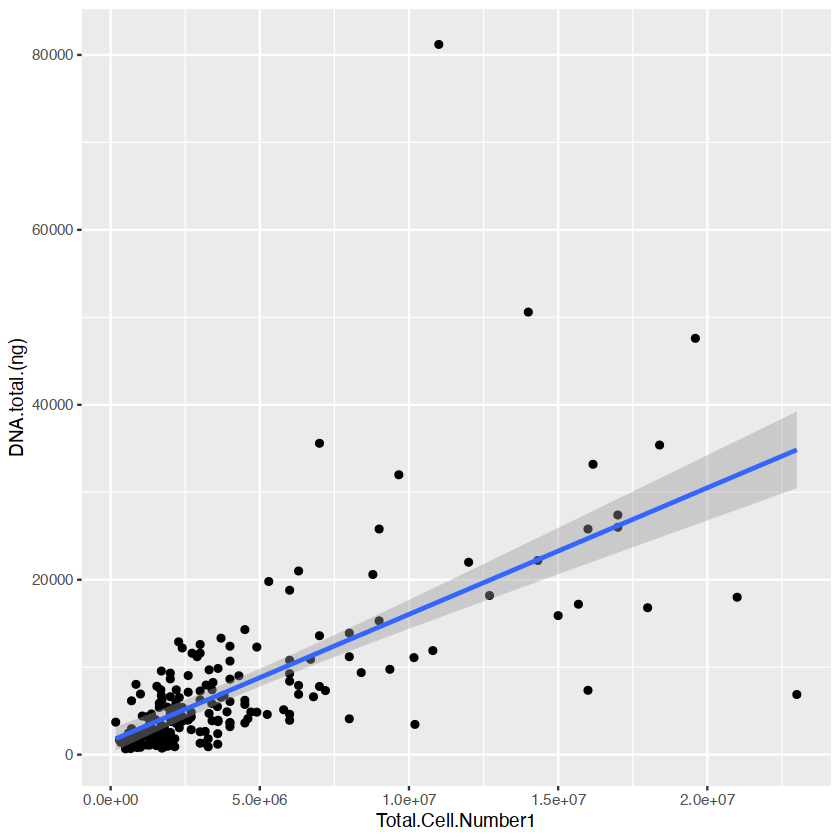

In [181]:
ggplot(data = tmp[ which(tmp$Total.Cell.Number1 < 30000000),], aes( y= `DNA.total.(ng)`, x = Total.Cell.Number1)) + geom_point() + geom_smooth( method = "lm")

In [183]:
lm(`DNA.total.(ng)` ~ Total.Cell.Number1, data = tmp[ which(tmp$Total.Cell.Number1 < 30000000),])


Call:
lm(formula = `DNA.total.(ng)` ~ Total.Cell.Number1, data = tmp[which(tmp$Total.Cell.Number1 < 
    3e+07), ])

Coefficients:
       (Intercept)  Total.Cell.Number1  
         1.577e+03           1.447e-03  


In [184]:
mod <- lm(`DNA.total.(ng)` ~ Total.Cell.Number1, data = tmp[ which(tmp$Total.Cell.Number1 < 30000000),])

In [191]:
f3 <- data.frame(`Total.Cell.Number1` = 100000)
predict(mod, f3, se.fit = TRUE, interval = "confidence")

,fit,lwr,upr
1,1721.734,346.635,3096.832


1          2          3          4          5          6          7 
-1.8057238  1.0968399  3.2523586  0.4194118  1.3788044  1.4764994 -0.1737129 
         8          9         10         11         12         13         14 
 0.7849248  1.1744572 -3.2269335 -1.7193428 -0.3001994 -2.1151217 -0.0308036 
        15 
 1.0410898

$fit
         1          2          3          4          5          6          7 
-4.0040841 -3.3333073 -2.6625305 -1.9917537 -1.3209769 -0.6502001  0.0205767 
         8          9         10         11         12         13 
 0.6913535  1.3621303  2.0329071  2.7036839  3.3744607  4.0452375 

$se.fit
        1         2         3         4         5         6         7         8 
0.8272550 0.7118263 0.6006676 0.4966544 0.4053253 0.3371508 0.3079152 0.3281950 
        9        10        11        12        13 
0.3903475 0.4783194 0.5804883 0.6905817 0.8053561 

$df
[1] 13

$residual.scale
[1] 1.191671

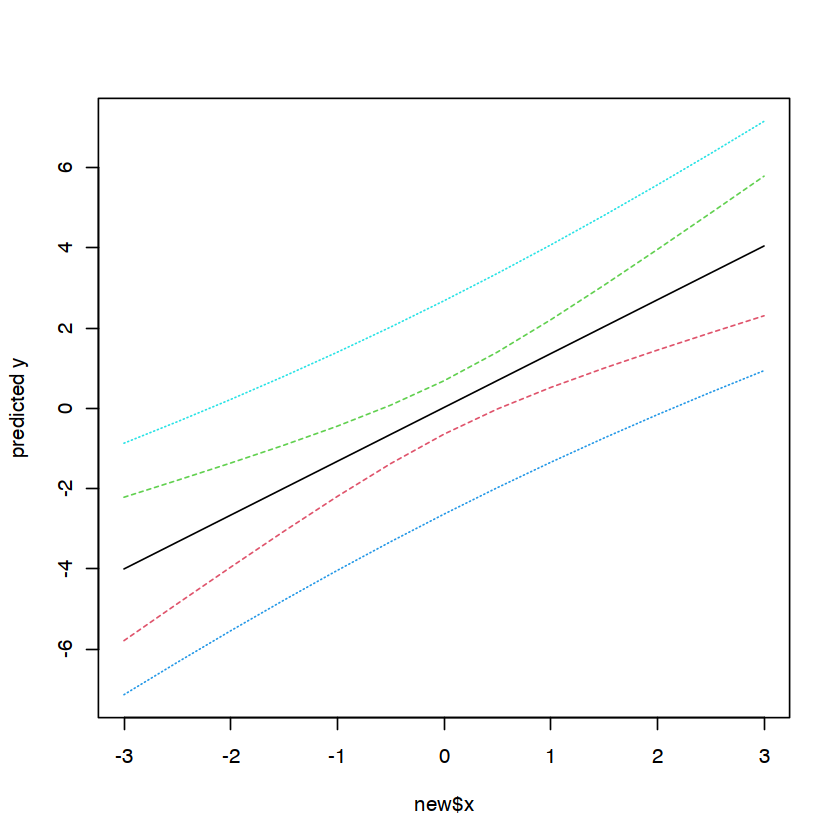

In [127]:
x <- rnorm(15)
y <- x + rnorm(15)
predict(lm(y ~ x))
new <- data.frame(x = seq(-3, 3, 0.5))
predict(lm(y ~ x), new, se.fit = TRUE)
pred.w.plim <- predict(lm(y ~ x), new, interval = "prediction")
pred.w.clim <- predict(lm(y ~ x), new, interval = "confidence")
matplot(new$x, cbind(pred.w.clim, pred.w.plim[,-1]),
        lty = c(1,2,2,3,3), type = "l", ylab = "predicted y")

In [130]:
pred.w.plim

,fit,lwr,upr
1,-4.0040841,-7.1380569,-0.8701112
2,-3.3333073,-6.3320803,-0.3345342
3,-2.6625305,-5.5455357,0.2204748
4,-1.9917537,-4.7808439,0.7973366
5,-1.3209769,-4.0402700,1.3983163
6,-0.6502001,-3.3257022,2.0253020
7,0.0205767,-2.6384257,2.6795791
8,0.6913535,-1.9789463,3.3616533
9,1.3621303,-1.3469165,4.0711770
10,2.0329071,-0.7411861,4.8070003


In [81]:
f3

Total.Cell.Number1
<dbl>
100


In [71]:
( 600 - coef(mod)[1] )/ coef(mod)[2]

(Intercept) 
   -5319065

In [34]:
head(pbmc[ order(pbmc$Total.Cell.Number1, decreasing = F), ])

,Shipment.#,Batch,Original.Box#,Original.Box.Location,Specimen.ID,Date.Frozen,Study.Cohort,Sample.Type,Date.transferred.to.Pugh.Lab,Total.Cell.Number,...,Total.Capture.Library.Yield.(ng),Miseq.for.Capture,Miseq.Flow.Cell.ID,Sent.for.Nextseq?,Date.Submitted.for.Seq,Pugh.Lab.Seq.ID,Vol.used.for.sequencing.(uL),Vol.Remaining.(uL),Capture.Notes,Total.Cell.Number1
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,...,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
383,2,14,Cell Box 2,G6,406-03,43620,NA,Cell,NA,9000,...,19.95,Passed,200612_M04827_0392_000000000-D879T,Yes,44314,BCX_tumour_CHP_PBMC_Remaining_Batches_PostCap_capTCRseq_NextSeq_Pool3,17.26,1.74,NA,9000
385,2,NA,Cell Box 2,E2,403-03,43585,NA,NA,NA,87000,...,0.00,NA,NA,NA,NA,NA,NA,NA,NA,87000
181,1,7,2,E6,375-02,43319,NA,Cell,NA,170000,...,235.60,Passed,191002_M04827_0273_000000000-D5FJK,Yes,43746,CHP Post-Cap TCR Libraries (24 samples) Nextseq Library Pool Batch 7,2.11,16.89,NA,170000
382,2,14,Cell Box 2,F7,414-01,43595,NA,Cell,NA,190000,...,19.95,Passed,200612_M04827_0392_000000000-D879T,Yes,44314,BCX_tumour_CHP_PBMC_Remaining_Batches_PostCap_capTCRseq_NextSeq_Pool3,17.26,1.74,NA,190000
283,2,10,Cell Box 2,D4,406-02,43573,NA,Cell,NA,200000,...,0.00,NA,NA,NA,NA,NA,NA,NA,NA,200000
413,2,NA,NA,NA,402-01,43507,NA,Cell,NA,200000,...,0.00,NA,NA,NA,NA,NA,NA,NA,NA,200000


In [21]:
# get total number of samples
pbmc_samples <- data.frame(pbmc$Specimen.ID[!duplicated(pbmc$Specimen.ID)], stringsAsFactors = F)

In [22]:
colnames(pbmc_samples) <- "sample_id"

In [23]:
#number of samples shipped
pbmc_samples$Shipped <- paste0("n = ", nrow(pbmc_samples))

In [24]:
pbmc_samples$sample_id <- trimws(pbmc_samples$sample_id)

In [25]:
pbmc_samples[pbmc_samples == "343-05"]

[1] "343-05"

In [26]:
dim(pbmc_samples)

[1] 321   2

In [27]:
head(pbmc_samples)

,sample_id,Shipped
,<chr>,<chr>
1,330-05,n = 321
2,329-04,n = 321
3,331-05,n = 321
4,331-04,n = 321
5,338-05,n = 321
6,338-04,n = 321


All samples that were shipped according to DB manifest files

In [70]:
allpbmc <- unlist(read.xlsx(paste0(datapath, "allpbmc_fromDB.xlsx"), sheet = 1))

In [71]:
allpbmc <- allpbmc[!is.na(allpbmc)]

In [72]:
names(allpbmc) <- NULL

In [73]:
#typo
allpbmc[ allpbmc == "388-5"] <- "388-05"

In [74]:
length(allpbmc)

[1] 312

312 cancer samples + 14 normal samples = 326. According to the lab log file we have 321.

In [75]:
allpbmc[! allpbmc %in% pbmc_samples$sample_id ]

[1] "335-05" "331-03" "423-02" "393-03" "383-01"

In [76]:
pbmc$Miseq.for.Library <- trimws(pbmc$Miseq.for.Library)

Get those with passed libs and capture. Add each failed steps later

In [77]:
table(pbmc$Miseq.for.Library, useNA = "always")


     Failed Failed BioA     On Hold      Passed    Received        <NA> 
         29          48          40         307           1          29 

In [78]:
libfailed <- pbmc[ which(pbmc$Miseq.for.Library != "Passed"),]

In [79]:
dim(libfailed)

[1] 118  60

In [80]:
pbmc$Miseq.for.Capture <- trimws(pbmc$Miseq.for.Capture)

In [81]:
table(pbmc$Miseq.for.Capture, useNA = "always")


         Failed         Failed?   Not Submitted          Passed Passed Re-Miseq 
              6               2              24             277               2 
           <NA> 
            143 

In [82]:
#cleanup
pbmc$Miseq.for.Capture[ pbmc$Miseq.for.Capture == "Failed?"] <- "Failed"
pbmc$Miseq.for.Capture[ pbmc$Miseq.for.Capture == "Passed Re-Miseq"] <- "Passed"

In [83]:
table(pbmc$Miseq.for.Capture, useNA = "always")


       Failed Not Submitted        Passed          <NA> 
            8            24           279           143 

In [84]:
capfailed <- pbmc[ which(pbmc$Miseq.for.Capture != "Passed"),]

In [85]:
dim(capfailed)

[1] 32 60

In [86]:
#remove failed samples
pbmc <- pbmc[ which(pbmc$Miseq.for.Library == "Passed"),]
pbmc <- pbmc[ which(pbmc$Miseq.for.Capture == "Passed"),]

In [87]:
table(pbmc$Miseq.for.Capture)


Passed 
   279 

Clean up failedsamples. If samples in libfailed are in cleanup pbmc, remove them. They were failed experiments but the sample eventually survived

In [88]:
libfailed <- libfailed[ !libfailed$Specimen.ID %in% pbmc$Specimen.ID,]

In [89]:
dim(libfailed)

[1] 64 60

In [90]:
#remove those in capture failed df. these were lib preped again, but capture failed
libfailed <- libfailed[ !libfailed$Specimen.ID %in% capfailed$Specimen.ID,]

In [91]:
dim(libfailed)

[1] 61 60

In [92]:
length(unique(libfailed$Specimen.ID))

[1] 39

In [93]:
libfailed_dedup <- libfailed[0,]
# to dedup, keep the most recent entry
for(i in unique(libfailed$Specimen.ID)){
    tmp <- libfailed[ libfailed$Specimen.ID == i,]
    libfailed_dedup <- rbind(libfailed_dedup, tmp[nrow(tmp),])
}

In [94]:
dim(libfailed_dedup)

[1] 39 60

If samples in capfailed are in cleanup pbmc, remove them. 

In [95]:
capfailed <- capfailed[!capfailed$Specimen.ID %in% pbmc$Specimen.ID,]

In [96]:
dim(capfailed)

[1]  4 60

In [97]:
p343_05 <- pbmc[ which(pbmc$Specimen.ID == "343-05"),]

One sample duplicated. Keep the one corresponding to batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-05-PBMC-DNA.txt

In [98]:
pbmc <- pbmc[ which(pbmc$Specimen.ID != "343-05"),]

In [99]:
pbmc <- rbind(pbmc, p343_05[ p343_05$Original.Box.Location == "G5",])

In [100]:
dim(pbmc)

[1] 278  60

In [101]:
#bind all pbmcs lib and cap failed
allsamples <- rbind(pbmc,libfailed_dedup, capfailed)

In [102]:
#add amount DNA extracted
pbmc_samples$DNAextracted <- NA
pbmc_samples$DNAextracted <- allsamples$`DNA.total.(ng)`[ match(pbmc_samples$sample_id, allsamples$Specimen.ID )]

In [103]:
#add amount DNA used for library
pbmc_samples$DNAused <- NA
pbmc_samples$DNAused <- allsamples$`Amount.of.DNA.used.for.Library.Prep.(ng)`[ match(pbmc_samples$sample_id, allsamples$Specimen.ID)]

In [104]:
pbmc_samples$libbatch <- NA
pbmc_samples$libbatch <- allsamples$Library.Miseq.Flow.Cell.ID[ match(pbmc_samples$sample_id, allsamples$Specimen.ID)]

In [105]:
head(pbmc_samples$libbatch )

[1] "190517_M04827_0203_000000000-D6BYT" "190517_M04827_0203_000000000-D6BYT"
[3] "190517_M04827_0203_000000000-D6BYT" "190517_M04827_0203_000000000-D6BYT"
[5] "190517_M04827_0203_000000000-D6BYT" "190517_M04827_0203_000000000-D6BYT"

In [106]:
# Add miseq status for libraries
pbmc_samples$librarypassed <- NA
pbmc_samples$librarypassed <- allsamples$Miseq.for.Library[ match(pbmc_samples$sample_id, allsamples$Specimen.ID)]

In [107]:
table(pbmc_samples$librarypassed, useNA = "always")


 On Hold   Passed Received     <NA> 
      38      282        1        0 

In [108]:
# add number of passed libraries
pbmc_samples$Library <- NA
pbmc_samples$Library[ pbmc_samples$librarypassed == "Passed"] <- paste0("n = ", 
                               length(pbmc_samples$librarypassed[which(pbmc_samples$librarypassed == "Passed")]))

In [109]:
#cleanup
pbmc_samples$librarypassed[ pbmc_samples$librarypassed == "On Hold"] <- "Failed"
pbmc_samples$librarypassed[ pbmc_samples$librarypassed == "Received"] <- "Failed"

In [110]:
table(pbmc_samples$librarypassed, useNA = "always")


Failed Passed   <NA> 
    39    282      0 

In [111]:
# add number of failed libraries
pbmc_samples$Library[ pbmc_samples$librarypassed == "Failed"] <- paste0("n = ", 
                               length(pbmc_samples$librarypassed[which(pbmc_samples$librarypassed == "Failed")]))

In [112]:
#add total library yield
pbmc_samples$libraryyield <- NA
pbmc_samples$libraryyield <- allsamples$`Total.Library.Yield.(ng)`[ match(pbmc_samples$sample_id, allsamples$Specimen.ID)]

In [113]:
#amount DNA used for capture
pbmc_samples$DNAforcapture <- NA
pbmc_samples$DNAforcapture <- allsamples$`Amount.of.Library.used.for.Capture.(ng)`[ match(pbmc_samples$sample_id, allsamples$Specimen.ID)]

In [114]:
#total capture yield
pbmc_samples$captureyield <- NA
pbmc_samples$captureyield <- allsamples$`Total.Capture.Library.Yield.(ng)`[ match(pbmc_samples$sample_id, allsamples$Specimen.ID)]

In [115]:
# Miseq batch for capture
pbmc_samples$capbatch <- NA
pbmc_samples$capbatch <- allsamples$Miseq.Flow.Cell.ID[ match(pbmc_samples$sample_id, allsamples$Specimen.ID)]

In [116]:
head(pbmc_samples$capbatch)

[1] "190624_M04827_0214_000000000-D6F66" "190624_M04827_0214_000000000-D6F66"
[3] "190624_M04827_0214_000000000-D6F66" "190624_M04827_0214_000000000-D6F66"
[5] "190624_M04827_0214_000000000-D6F66" "190624_M04827_0214_000000000-D6F66"

In [117]:
# Miseq status for capture
pbmc_samples$capturepassed <- NA
pbmc_samples$capturepassed <- allsamples$Miseq.for.Capture[ match(pbmc_samples$sample_id, allsamples$Specimen.ID)]

In [118]:
# Number of passed captures
pbmc_samples$Capture <- NA
pbmc_samples$Capture[ pbmc_samples$capturepassed == "Passed"] <- paste0("n = ", 
                                                                        length(pbmc_samples$capturepassed[which(pbmc_samples$capturepassed == "Passed")]))

In [119]:
table(pbmc_samples$capturepassed, useNA = "always")


       Failed Not Submitted        Passed          <NA> 
            1             3           278            39 

In [120]:
# cleanup
pbmc_samples$capturepassed[ which(pbmc_samples$capturepassed == "Not Submitted")] <- "Failed"

In [121]:
table(pbmc_samples$capturepassed, useNA = "always")


Failed Passed   <NA> 
     4    278     39 

In [122]:
pbmc_samples$deepseq <- NA
pbmc_samples$deepseq <- trimws(pbmc$`Sent.for.Nextseq?`[ match(pbmc_samples$sample_id, pbmc$Specimen.ID)])
#pbmc_samples$deepseq[is.na(pbmc_samples$deepseq)] <- "No"

In [123]:
table(pbmc_samples$deepseq, useNA = "always")


Re-seq    Yes   <NA> 
    14    264     43 

In [124]:
#clean up
pbmc_samples$deepseq[ pbmc_samples$deepseq == "Re-seq"] <- "Yes"

In [125]:
table(pbmc_samples$deepseq, useNA = "always")


 Yes <NA> 
 278   43 

In [126]:
table(pbmc_samples$deepseq == "Yes")


TRUE 
 278 

In [127]:
# number of deep sequencing samples
pbmc_samples$Sequencing <- NA
pbmc_samples$Sequencing[ pbmc_samples$deepseq == "Yes"] <- paste0("n = ", table(pbmc_samples$deepseq == "Yes"))

In [128]:
#make a new sample id to match with divstats
pbmc_samples$mysample_id <- NA

pbmc_samples$mysample_id <- paste0("CHP_", pbmc_samples$sample_id, sep = "")
pbmc_samples$mysample_id <- gsub("-", "_", pbmc_samples$mysample_id)

pbmc_samples$mysample_id[ grepl("YO", pbmc_samples$mysample_id)] <- paste0(
    pbmc_samples$mysample_id[ grepl("YO", pbmc_samples$mysample_id)], "_00")

pbmc_samples$mysample_id[ grepl("MO", pbmc_samples$mysample_id)] <- paste0(
    pbmc_samples$mysample_id[ grepl("MO", pbmc_samples$mysample_id)], "_00")

In [129]:
colnames(divstats)

[1] "TRB"                "Reads"              "CPKR"              
 [4] "Average_reads"      "VMR"                "Max_reads"         
 [7] "Singletons"         "Doubletons"         "qD"                
[10] "Sample_Coverage"    "observed_Richness"  "estimated_Richness"
[13] "SE_Richeness"       "observed_Shannon"   "estimated_Shannon" 
[16] "SE_Shannon"         "observed_Simpson"   "estimated_Simpson" 
[19] "SE_Simpson"         "sample_id"          "basename"          
[22] "file"

In [130]:
divstats_pbmc <- divstats[ divstats$Sample == "PBMC",]

In [131]:
dim( divstats_pbmc)

[1]  9 22

In [132]:
# Samples included in tcr analysis
pbmc_samples$TCR <- NA
pbmc_samples$TCR[ pbmc_samples$mysample_id %in% divstats_pbmc$sample_id] <- "Yes"
pbmc_samples$TCR[ is.na(pbmc_samples$TCR)] <- "No"

In [133]:
table(pbmc_samples$TCR, useNA = "always")


  No <NA> 
 321    0 

In [134]:
head(pbmc_samples)

,sample_id,Shipped,DNAextracted,DNAused,libbatch,librarypassed,Library,libraryyield,captureyield,capbatch,capturepassed,Capture,deepseq,Sequencing,mysample_id,TCR
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,330-05,n = 321,6160,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,825.6,155.42,190624_M04827_0214_000000000-D6F66,Passed,n = 278,Yes,n = 278,CHP_330_05,No
2,329-04,n = 321,11200,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,2006.4,155.42,190624_M04827_0214_000000000-D6F66,Passed,n = 278,Yes,n = 278,CHP_329_04,No
3,331-05,n = 321,3780,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,1161.6,162.64,190624_M04827_0214_000000000-D6F66,Passed,n = 278,Yes,n = 278,CHP_331_05,No
4,331-04,n = 321,9700,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,1555.2,162.64,190624_M04827_0214_000000000-D6F66,Passed,n = 278,Yes,n = 278,CHP_331_04,No
5,338-05,n = 321,1410,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,508.8,328.70,190624_M04827_0214_000000000-D6F66,Passed,n = 278,Yes,n = 278,CHP_338_05,No
6,338-04,n = 321,2460,600,190517_M04827_0203_000000000-D6BYT,Passed,n = 282,883.2,328.70,190624_M04827_0214_000000000-D6F66,Passed,n = 278,Yes,n = 278,CHP_338_04,No


In [135]:
pbmc_samples$capturepassed[is.na(pbmc_samples$capturepassed)] <- ""

In [136]:
table(pbmc_samples$capturepassed, useNA = "always")


       Failed Passed   <NA> 
    39      4    278      0 

In [137]:
# Number of failed captures
capturefailed <- sum(pbmc_samples$capturepassed == "Failed")
pbmc_samples$Capture[pbmc_samples$capturepassed == "Failed"] <- paste0("n = ", capturefailed)

In [138]:
# Number of samples not deep seq'd == 0
seqfailed <- sum(pbmc_samples$deepseq == "No"& pbmc_samples$capturepassed == "Passed")
seqfailed

[1] 0

In [139]:
# Number of samples included in tcr analysis
pbmc_samples$TCRanalysis <- NA

tcrpassed <- sum(pbmc_samples$TCR == "Yes" & 
                 pbmc_samples$deepseq == "Yes" &
                 pbmc_samples$capturepassed == "Passed")

pbmc_samples$TCRanalysis[pbmc_samples$TCR == "Yes" & 
                 pbmc_samples$deepseq == "Yes" &
                 pbmc_samples$capturepassed == "Passed"] <- paste0("n = ", sum(pbmc_samples$TCR == "Yes" & 
                 pbmc_samples$deepseq == "Yes" &
                 pbmc_samples$capturepassed == "Passed"))

the following sample was annotated as Failed capture miseq, but I got the data. For now, I dont include in sankey plot

In [140]:
pbmc_samples[ pbmc_samples$sample_id == "383-03",]

,sample_id,Shipped,DNAextracted,DNAused,libbatch,librarypassed,Library,libraryyield,captureyield,capbatch,capturepassed,Capture,deepseq,Sequencing,mysample_id,TCR,TCRanalysis
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
141,383-03,n = 321,7280,600,191104_M04827_0295_000000000-D7FHM,Passed,n = 282,35.328,47.12,191121_M04827_0308_000000000-D7HCV,Failed,n = 4,NA,NA,CHP_383_03,No,NA


In [141]:
table(pbmc_samples$TCRanalysis )

< table of extent 0 >

In [142]:
# Number of samples not included in TCR analysis
tcrfailed <- sum(pbmc_samples$TCR == "No" & 
                 pbmc_samples$deepseq == "Yes" &
                 pbmc_samples$capturepassed == "Passed")

pbmc_samples$TCRanalysis[pbmc_samples$TCR == "No" & 
                         pbmc_samples$deepseq == "Yes" &
                         pbmc_samples$capturepassed == "Passed"] <- paste0("n = ", tcrfailed)

In [143]:
dim(pbmc_samples)

[1] 321  17

In [144]:
table(pbmc_samples$TCRanalysis, useNA = "always")


n = 278    <NA> 
    278      43 

In [145]:
# Create a patient ID
pbmc_samples$Patient <- substr(pbmc_samples$mysample_id, 0,7)

In [146]:
# add tumour type
pbmc_samples$Tumor <- NA
pbmc_samples$Tumor <- metadata$Disease_type[match(pbmc_samples$Patient, metadata$Patient)]

In [147]:
# add tumour group
pbmc_samples$Group <- NA
pbmc_samples$Group <- metadata$group[match(pbmc_samples$Patient, metadata$Patient)]

In [148]:
#remove tumor and group for samples not included in TCR analysis
pbmc_samples$Group[ pbmc_samples$TCR == "No"] <- NA
pbmc_samples$Tumor[ pbmc_samples$TCR == "No"] <- NA

In [149]:
#some colname cleanup
colnames(pbmc_samples)[colnames(pbmc_samples) == "Library"] <- "Library preparation"
colnames(pbmc_samples)[colnames(pbmc_samples) == "Capture"] <- "Successful capture"
colnames(pbmc_samples)[colnames(pbmc_samples) == "Sequencing"] <- "Deep sequencing"
colnames(pbmc_samples)[colnames(pbmc_samples) == "TCRanalysis"] <- "TCR analysis"

In [150]:
save(pbmc_samples, file = paste0(gitpath, "data/pbmc_sampleprocessing.RData"))

# cfDNA

I modified the log file in excel added rm in column C. 

In [9]:
cfdna <- read.xlsx(paste0(datapath, "CHOP Lab Processing Log_AN.xlsx"), sheet = 1)

In [10]:
cfdna$Sample.ID <- trimws(cfdna$Sample.ID)

In [11]:
length(cfdna$Sample.ID)

[1] 355

In [12]:
cfdna$Colour.Legend <- NULL

In [13]:
cfdna <- cfdna[ which(cfdna$`Batch.#` != "rm"),]

In [14]:
dim(cfdna)

[1] 316  55

In [15]:
head(cfdna)

,Shipment.#,Batch.#,Sample.ID,Original.Box.#,Original.Box.Location,Sample.Type,Original.Plasma.Volume.(ml),Extraction.Date,Extraction.Operator,Concentration.Elution.1.(ng/ul),...,Amout.(ng),Miseq.for.Capture,Miseq.Flow.Cell.ID,Sent.for.Nextseq?,Date.Submitted.for.Seq,Pugh.Lab.Seq.Submission.ID,Vol.used.for.Seq.(uL),Vol.Remaining.(uL),Capture.Notes,X56
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,...,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
2,1,1,346-01,1,E1,Plasma,4.5,43523,JW,0.65200000000000002,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1,1a,348-01,1,G5,Plasma,4.5,43511,RP/JW,0.48,...,733.4,Passed,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,5.95,13.05,NA,NA
6,1,1a,348-03,3,H2,Plasma,3.0,43511,RP/JW,0.75600000000000001,...,733.4,Passed,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,5.95,13.05,NA,NA
7,1,1a,343-04,2,H5,Plasma,4.5,43504,RP/JW,0.56000000000000005,...,1052.6,Passed,200909_M04827_0434_000000000-D9988,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,3.26,15.74,NA,NA
9,1,1a,329-04,2,I2,Plasma,3.0,43511,RP/JW,0.99199999999999999,...,1132.4,Passed,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,2.67,16.33,NA,NA
10,1,1a,331-05,3,D6,Plasma,6.0,43516,RP/JW,0.89200000000000002,...,1565.6,Passed,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,4.84,14.16,NA,NA


In [16]:
cfdna[ cfdna$Sample.ID == "403-03",]

,Shipment.#,Batch.#,Sample.ID,Original.Box.#,Original.Box.Location,Sample.Type,Original.Plasma.Volume.(ml),Extraction.Date,Extraction.Operator,Concentration.Elution.1.(ng/ul),...,Amout.(ng),Miseq.for.Capture,Miseq.Flow.Cell.ID,Sent.for.Nextseq?,Date.Submitted.for.Seq,Pugh.Lab.Seq.Submission.ID,Vol.used.for.Seq.(uL),Vol.Remaining.(uL),Capture.Notes,X56
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,...,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
338,2,16b,403-03,2,G03,Plasma,0.35,43770,MC,5.0000000000000001E-3,...,741,Passed,200821_M04827_0425_000000000-D9BP6,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool1,4.05,14.95,NA,NA


In [17]:
# get total number of samples shipped
cfdna_samples <- data.frame(cfdna$Sample.ID, stringsAsFactors = F)

In [18]:
cfdna$samplevol <- as.numeric(cfdna$`Original.Plasma.Volume.(ml)`)
cfdna$yield <- as.numeric(cfdna$`Total.yield.Elution.1`)

In [19]:
colnames(cfdna)

[1] "Shipment.#"                                        
 [2] "Batch.#"                                           
 [3] "Sample.ID"                                         
 [4] "Original.Box.#"                                    
 [5] "Original.Box.Location"                             
 [6] "Sample.Type"                                       
 [7] "Original.Plasma.Volume.(ml)"                       
 [8] "Extraction.Date"                                   
 [9] "Extraction.Operator"                               
[10] "Concentration.Elution.1.(ng/ul)"                   
[11] "Elution.1.volume.(ul)"                             
[12] "Total.yield.Elution.1"                             
[13] "Concentration.Elution.2.(ng/ul)"                   
[14] "Elution.2.Volume.(ul)"                             
[15] "Total.yield.Elution.2"                             
[16] "Total.yield.1+2"                                   
[17] "Elution.Buffer.Type"                               
[18] "Extraction.Protocol"                               
[19] "Notes"                                             
[20] "Library.Prep.Date"                                 
[21] "Library.Prep.Technician"                           
[22] "Sample.Vol.used.for.Library.Prep.(uL)"             
[23] "Amount.of.DNA.used.for.library.prep.(ng)"          
[24] "Remaining.amount.of.DNA.(ng)"                      
[25] "Library.ID"                                        
[26] "Adaptor"                                           
[27] "Adaptor.Sequence"                                  
[28] "Number.of.PCR.Cycles.for.Library.Amplification"    
[29] "Library.Qubit.(ng/uL)"                             
[30] "Final.Library.Vol.(uL)"                            
[31] "Amount.of.DNA.(ng)"                                
[32] "Miseq.for.Library"                                 
[33] "Library.Miseq.Flow.Cell.ID"                        
[34] "Library.Prep.Notes"                                
[35] "Capture.Date"                                      
[36] "Capture.Technician"                                
[37] "Sample.Vol.used.for.Capture.(ul)"                  
[38] "Amount.of.Library.used.for.Capture.Pooling.(ng)"   
[39] "Remaining.Amount.of.Library.(ng)"                  
[40] "Capture.Pool.ID"                                   
[41] "Number.of.Libraries.to.Pool.for.1ug.target.capture"
[42] "Number.of.PCR.Amp.Cycles.(Day.2)"                  
[43] "Number.of.PCR.Amp.Cycles.post-capture.(Day.4)"     
[44] "Qubit.Concentration.Post-cap.(ng/uL)"              
[45] "Final.Capture.Vol.(uL)"                            
[46] "Amout.(ng)"                                        
[47] "Miseq.for.Capture"                                 
[48] "Miseq.Flow.Cell.ID"                                
[49] "Sent.for.Nextseq?"                                 
[50] "Date.Submitted.for.Seq"                            
[51] "Pugh.Lab.Seq.Submission.ID"                        
[52] "Vol.used.for.Seq.(uL)"                             
[53] "Vol.Remaining.(uL)"                                
[54] "Capture.Notes"                                     
[55] "X56"                                               
[56] "samplevol"                                         
[57] "yield"

In [20]:
head(cfdna)

,Shipment.#,Batch.#,Sample.ID,Original.Box.#,Original.Box.Location,Sample.Type,Original.Plasma.Volume.(ml),Extraction.Date,Extraction.Operator,Concentration.Elution.1.(ng/ul),...,Miseq.Flow.Cell.ID,Sent.for.Nextseq?,Date.Submitted.for.Seq,Pugh.Lab.Seq.Submission.ID,Vol.used.for.Seq.(uL),Vol.Remaining.(uL),Capture.Notes,X56,samplevol,yield
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,...,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2,1,1,346-01,1,E1,Plasma,4.5,43523,JW,0.65200000000000002,...,NA,NA,NA,NA,NA,NA,NA,NA,4.5,19.5600
4,1,1a,348-01,1,G5,Plasma,4.5,43511,RP/JW,0.48,...,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,5.95,13.05,NA,NA,4.5,14.4000
6,1,1a,348-03,3,H2,Plasma,3.0,43511,RP/JW,0.75600000000000001,...,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,5.95,13.05,NA,NA,3.0,24.4944
7,1,1a,343-04,2,H5,Plasma,4.5,43504,RP/JW,0.56000000000000005,...,200909_M04827_0434_000000000-D9988,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,3.26,15.74,NA,NA,4.5,56.0000
9,1,1a,329-04,2,I2,Plasma,3.0,43511,RP/JW,0.99199999999999999,...,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,2.67,16.33,NA,NA,3.0,40.0768
10,1,1a,331-05,3,D6,Plasma,6.0,43516,RP/JW,0.89200000000000002,...,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,4.84,14.16,NA,NA,6.0,71.3600


In [40]:
summary(cfdna$samplevol[ cfdna$yield >= 20])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.191   0.900   3.000   2.846   4.500   9.000 

In [22]:
summary(cfdna$yield)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.40   18.88   35.04  203.51  100.80 9120.00 

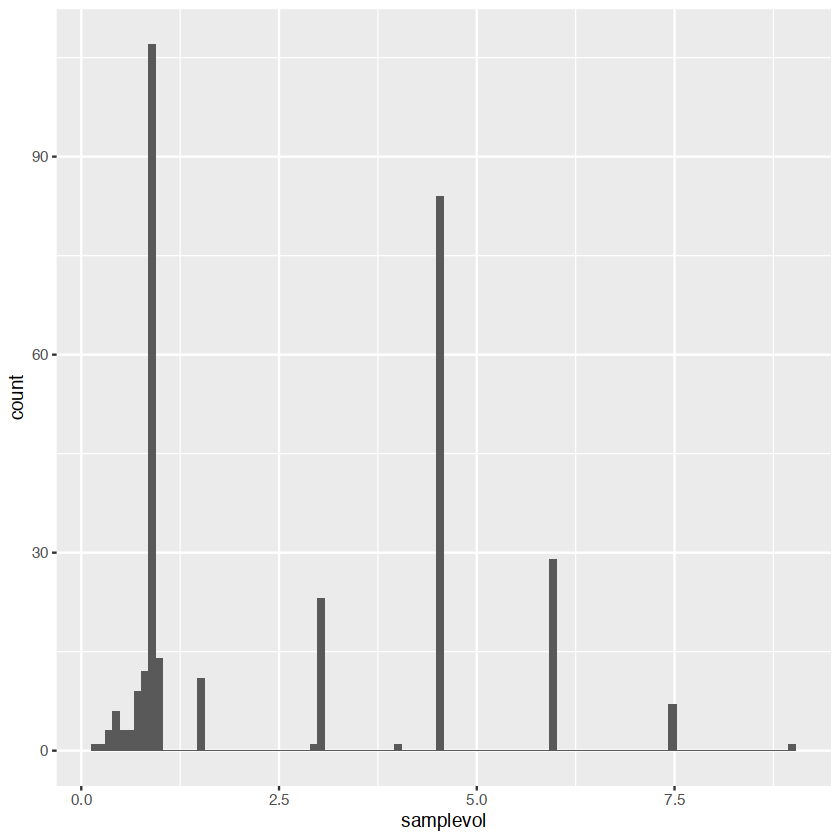

In [61]:
ggplot(data = cfdna, aes(x= samplevol)) + geom_histogram(bins = 100)

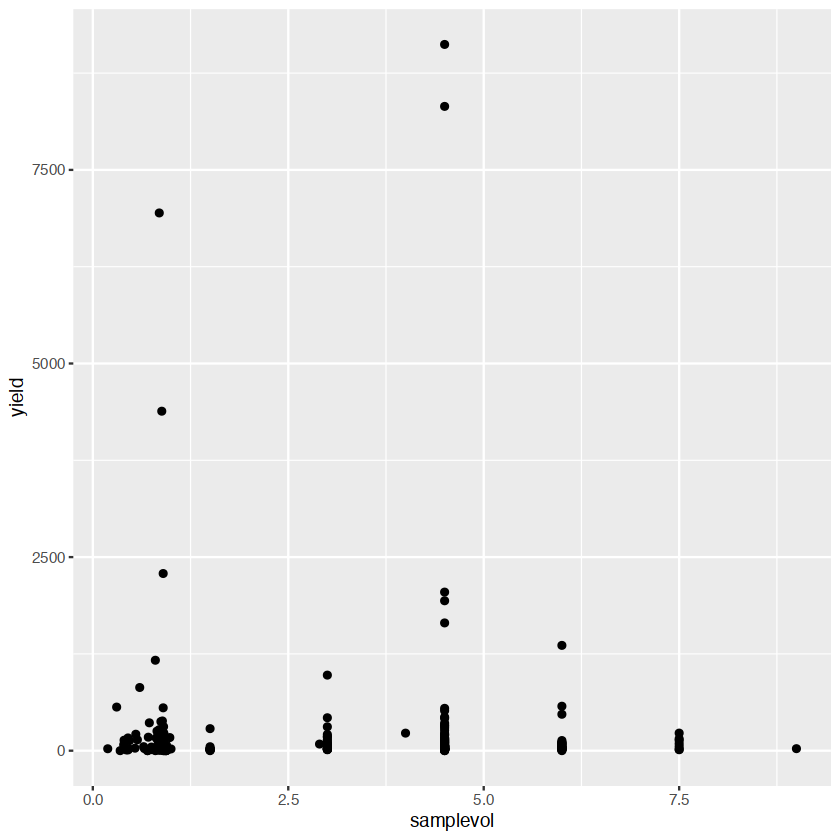

In [93]:
ggplot(data = cfdna, aes( y= yield, x = samplevol)) + geom_point() 
# geom_smooth( method = "lm")+
# geom_hline( yintercept = 20, linetype = "dashed") + 
 #+ geom_smooth( method = "lm")

In [24]:
head(cfdna)

,Shipment.#,Batch.#,Sample.ID,Original.Box.#,Original.Box.Location,Sample.Type,Original.Plasma.Volume.(ml),Extraction.Date,Extraction.Operator,Concentration.Elution.1.(ng/ul),...,Miseq.Flow.Cell.ID,Sent.for.Nextseq?,Date.Submitted.for.Seq,Pugh.Lab.Seq.Submission.ID,Vol.used.for.Seq.(uL),Vol.Remaining.(uL),Capture.Notes,X56,samplevol,yield
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,...,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2,1,1,346-01,1,E1,Plasma,4.5,43523,JW,0.65200000000000002,...,NA,NA,NA,NA,NA,NA,NA,NA,4.5,19.5600
4,1,1a,348-01,1,G5,Plasma,4.5,43511,RP/JW,0.48,...,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,5.95,13.05,NA,NA,4.5,14.4000
6,1,1a,348-03,3,H2,Plasma,3.0,43511,RP/JW,0.75600000000000001,...,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,5.95,13.05,NA,NA,3.0,24.4944
7,1,1a,343-04,2,H5,Plasma,4.5,43504,RP/JW,0.56000000000000005,...,200909_M04827_0434_000000000-D9988,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,3.26,15.74,NA,NA,4.5,56.0000
9,1,1a,329-04,2,I2,Plasma,3.0,43511,RP/JW,0.99199999999999999,...,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,2.67,16.33,NA,NA,3.0,40.0768
10,1,1a,331-05,3,D6,Plasma,6.0,43516,RP/JW,0.89200000000000002,...,200911_M04827_0435_000000000-D9GW9,Yes,44271,CHP-cfDNA-Remaining-Batches-PostCap-capTCRseq-NextSeq-Pool5,4.84,14.16,NA,NA,6.0,71.3600


In [25]:
cfdna$Patient <- gsub("-.*","", cfdna$Sample.ID )

In [27]:
cfdna$Patient <- paste0("CHP_", cfdna$Patient)

In [30]:
nbl <- c("CHP_346", "CHP_385", "CHP_379", "CHP_418", "CHP_384")

In [31]:
nbl_cfdna <- cfdna[ cfdna$Patient %in% nbl,]

In [37]:
nbl_cfdna$Patient

[1] "CHP_346" "CHP_379" "CHP_418" "CHP_418" "CHP_385" "CHP_385" "CHP_385"
 [8] "CHP_384" "CHP_385" "CHP_385"

In [36]:
dim(nbl_cfdna)

[1] 10 58

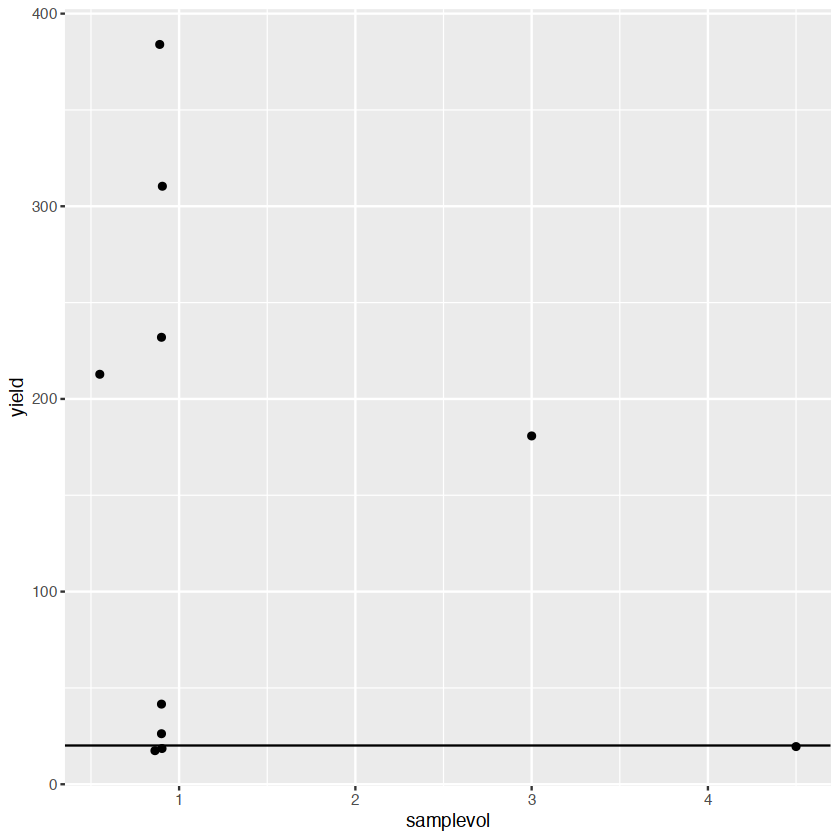

In [33]:
ggplot(data = nbl_cfdna, aes( y= yield, x = samplevol)) + geom_point() + geom_hline(yintercept = 20) 
#coord_cartesian(y = c(0,100)) #+ geom_smooth( method = "lm")

In [35]:
summary(nbl_cfdna$samplevol)
summary(nbl_cfdna$yield)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5500  0.8925  0.9000  1.4311  0.9045  4.5000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.44   21.23  111.20  144.34  227.20  384.00 

In [29]:
metadata[ metadata$Disease_type == "MS NB",]

,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,CM,...,cancergroup,agegroup,foldgroup,sample_id,Remission,Relapse,Transplant,CART,vital_status,LOF
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<int>,...,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
326,CHP_384,1,1.6,0,0.4,MS NB,1.6,1762,25,127,...,Solid,< 2 yrs,Low,CHP_384_01,1,0,0,0,0,0
327,CHP_384,2,0.0,0,0.4,MS NB,0.0,0,NA,NA,...,Solid,< 2 yrs,Low,CHP_384_02,1,0,0,0,0,0
328,CHP_384,3,0.0,0,0.4,MS NB,0.0,0,NA,NA,...,Solid,< 2 yrs,Low,CHP_384_03,1,0,0,0,0,0
329,CHP_384,4,0.0,0,0.4,MS NB,0.0,0,NA,NA,...,Solid,< 2 yrs,Low,CHP_384_04,1,0,0,0,0,0
330,CHP_384,5,0.0,0,0.4,MS NB,0.0,0,NA,NA,...,Solid,< 2 yrs,Low,CHP_384_05,1,0,0,0,0,0


In [218]:
head(metadata)

,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,CM,...,cancergroup,agegroup,foldgroup,sample_id,Remission,Relapse,Transplant,CART,vital_status,LOF
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<int>,...,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,CHP_319,1,1.4,0,1,HR ALL,1.4,0,NA,NA,...,Leukemia,< 2 yrs,Low,CHP_319_01,0,1,0,1,1,0
2,CHP_319,2,7.9,0,1,HR ALL,7.9,0,NA,NA,...,Leukemia,< 2 yrs,High,CHP_319_02,0,1,0,1,1,0
3,CHP_319,3,1.8,0,1,HR ALL,1.8,0,NA,NA,...,Leukemia,< 2 yrs,Low,CHP_319_03,0,1,0,1,1,0
4,CHP_319,4,1.5,0,1,HR ALL,1.5,0,NA,NA,...,Leukemia,< 2 yrs,Low,CHP_319_04,0,1,0,1,1,0
5,CHP_319,5,1.2,0,1,HR ALL,1.2,0,NA,NA,...,Leukemia,< 2 yrs,Low,CHP_319_05,0,1,0,1,1,0
6,CHP_320,1,8.9,0,6,AML,8.9,0,NA,NA,...,Leukemia,5-11 yrs,High,CHP_320_01,0,1,0,0,1,0


In [158]:
colnames(cfdna_samples) <- "sample_id"

In [159]:
dim(cfdna_samples)

[1] 316   1

In [160]:
#number of DNA samples extratced
cfdna_samples$DNAsamples <- paste0("n = ", nrow(cfdna_samples))

In [161]:
head(cfdna_samples)

,sample_id,DNAsamples
,<chr>,<chr>
1,346-01,n = 316
2,348-01,n = 316
3,348-03,n = 316
4,343-04,n = 316
5,329-04,n = 316
6,331-05,n = 316


In [162]:
cfdna_samples$sample_id <- trimws(cfdna_samples$sample_id)

All samples that were shipped according to DB manifest files

In [163]:
allcfdna <- unlist(read.xlsx(paste0(datapath, "allcfdna_fromDB.xlsx"), sheet = 1))

In [164]:
allcfdna <- allcfdna[ !is.na(allcfdna)]
allcfdna <- allcfdna[ !grepl("Box", allcfdna)]
allcfdna <- allcfdna[ !grepl("X", allcfdna)]

In [165]:
allcfdna <- gsub(";", "", allcfdna)
allcfdna <- gsub("--", "-", allcfdna)

In [166]:
names(allcfdna) <- NULL

In [167]:
allcfdna <- trimws(allcfdna)

In [168]:
allcfdna[ !allcfdna %in% cfdna_samples$sample_id]

[1] "335-02" "341-05" "339-02" "341-05" "345-05" "406-03" "341-05" "365-04"
[9] "355-05"

Samples above were in the manifest file from DB but were not processed in our lab. Not sure what happened.
335-02 missing. 341-05, 345-05, 365-04 too low dna extracted. 339-02?. 406-03 tube emtpy. 355-05?

In [169]:
cfdna_samples[!cfdna_samples$sample_id %in% allcfdna,]

,sample_id,DNAsamples
,<chr>,<chr>
60,409-02,n = 316
96,364-03,n = 316


samples above were processed in our lab but were not in the manifest file from DB. 

409-02: Sample was not on the Processing log but was in the box.
364-03: Not sure, gotta ask Steph

In [170]:
cfdna$Miseq.for.Library <- trimws(cfdna$Miseq.for.Library)

Get those with passed libs and capture. Add each failed steps later

In [171]:
table(cfdna$Miseq.for.Library, useNA = "always")


  Passed Received     <NA> 
     315        1        0 

In [172]:
cfdna$Miseq.for.Library[ cfdna$Miseq.for.Library == "Received"] <- "Passed"

In [173]:
cfdna$Miseq.for.Capture <- trimws(cfdna$Miseq.for.Capture)

In [174]:
table(cfdna$Miseq.for.Capture, useNA = "always")


Failed Passed   <NA> 
     1    295     20 

In [175]:
cfdna$Miseq.for.Capture[ is.na(cfdna$Miseq.for.Capture)] <- "Failed"

In [176]:
capfailed <- cfdna[ which(cfdna$Miseq.for.Capture != "Passed"),]

In [177]:
dim(capfailed)

[1] 21 55

In [178]:
#remove failed samples
cfdna <- cfdna[ which(cfdna$Miseq.for.Library == "Passed"),]
cfdna <- cfdna[ which(cfdna$Miseq.for.Capture == "Passed"),]

In [179]:
table(cfdna$Miseq.for.Capture)


Passed 
   295 

In [180]:
#bind all cfdna and cap failed
allsamples <- rbind(cfdna, capfailed)

In [181]:
#add amount DNA extracted
cfdna_samples$DNAextracted <- NA
cfdna_samples$DNAextracted <- allsamples$`Total.yield.1+2`[ match(cfdna_samples$sample_id, allsamples$Sample.ID )]

In [182]:
#add amount DNA used for library
cfdna_samples$DNAused <- NA
cfdna_samples$DNAused <- allsamples$`Amount.of.DNA.used.for.library.prep.(ng)`[ match(cfdna_samples$sample_id, allsamples$Sample.ID)]

In [183]:
# Add miseq status for libraries
cfdna_samples$librarypassed <- NA
cfdna_samples$librarypassed <- allsamples$Miseq.for.Library[ match(cfdna_samples$sample_id, allsamples$Sample.ID)]

In [184]:
cfdna_samples$libbatch <- allsamples$Library.Miseq.Flow.Cell.ID[ match(cfdna_samples$sample_id, allsamples$Sample.ID)]

In [185]:
table(cfdna_samples$librarypassed, useNA = "always")


Passed   <NA> 
   316      0 

In [186]:
# add number of passed libraries
cfdna_samples$Library <- NA
cfdna_samples$Library[ cfdna_samples$librarypassed == "Passed"] <- paste0("n = ", 
                               length(cfdna_samples$librarypassed[which(cfdna_samples$librarypassed == "Passed")]))

In [187]:
table(cfdna_samples$librarypassed, useNA = "always")


Passed   <NA> 
   316      0 

In [188]:
#add total library yield
cfdna_samples$libraryyield <- NA
cfdna_samples$libraryyield <- allsamples$`Amount.of.DNA.(ng)`[ match(cfdna_samples$sample_id, allsamples$Sample.ID)]

In [189]:
#amount DNA used for capture
cfdna_samples$DNAforcapture <- NA
cfdna_samples$DNAforcapture <- allsamples$`Amount.of.Library.used.for.Capture.Pooling.(ng)`[ match(cfdna_samples$sample_id, allsamples$Sample.ID)]

In [190]:
#total capture yield
cfdna_samples$captureyield <- NA
cfdna_samples$captureyield <- allsamples$`Amout.(ng)`[ match(cfdna_samples$sample_id, allsamples$Sample.ID)]

In [191]:
cfdna_samples$capbatch <- allsamples$Miseq.Flow.Cell.ID[ match(cfdna_samples$sample_id, allsamples$Sample.ID)]

In [192]:
# Miseq status for capture
cfdna_samples$capturepassed <- NA
cfdna_samples$capturepassed <- allsamples$Miseq.for.Capture[ match(cfdna_samples$sample_id, allsamples$Sample.ID)]

In [193]:
# Number of passed captures
cfdna_samples$Capture <- NA
cfdna_samples$Capture[ cfdna_samples$capturepassed == "Passed"] <- paste0("n = ", 
                                                                        length(cfdna_samples$capturepassed[which(cfdna_samples$capturepassed == "Passed")]))

In [194]:
table(cfdna_samples$capturepassed, useNA = "always")


Failed Passed   <NA> 
    21    295      0 

In [195]:
cfdna_samples$capturepassed <- trimws(cfdna_samples$capturepassed)

In [196]:
head(cfdna_samples)

,sample_id,DNAsamples,DNAextracted,DNAused,librarypassed,libbatch,Library,libraryyield,DNAforcapture,captureyield,capbatch,capturepassed,Capture
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,346-01,n = 316,19.5600,20,Passed,200605_M04827_0389_000000000-D86L3,n = 316,237.12,NA,NA,NA,Failed,NA
2,348-01,n = 316,14.4000,20,Passed,200605_M04827_0389_000000000-D86L3,n = 316,159.36,159.36,733.4,200911_M04827_0435_000000000-D9GW9,Passed,n = 295
3,348-03,n = 316,24.4944,20,Passed,200605_M04827_0389_000000000-D86L3,n = 316,227.52,227.52,733.4,200911_M04827_0435_000000000-D9GW9,Passed,n = 295
4,343-04,n = 316,56.0000,20,Passed,190730_M04827_0235_000000000-D6WF7,n = 316,291.84,291.84,1052.6,200909_M04827_0434_000000000-D9988,Passed,n = 295
5,329-04,n = 316,40.0768,20,Passed,200605_M04827_0389_000000000-D86L3,n = 316,314.88,314.88,1132.4,200911_M04827_0435_000000000-D9GW9,Passed,n = 295
6,331-05,n = 316,82.4000,20,Passed,190730_M04827_0235_000000000-D6WF7,n = 316,811.20,499.13,1565.6,200911_M04827_0435_000000000-D9GW9,Passed,n = 295


In [197]:
cfdna_samples$deepseq <- NA
cfdna_samples$deepseq <- trimws(cfdna$`Sent.for.Nextseq?`[ match(cfdna_samples$sample_id, cfdna$Sample.ID)])
#pbmc_samples$deepseq[is.na(pbmc_samples$deepseq)] <- "No"

In [198]:
table(cfdna_samples$deepseq, useNA = "always")


 Yes <NA> 
 295   21 

In [199]:
cfdna_samples$deepseq[ is.na(cfdna_samples$deepseq)] <- "No"

In [200]:
table(cfdna_samples$deepseq == "Yes")


FALSE  TRUE 
   21   295 

In [201]:
dim(cfdna_samples)

[1] 316  14

In [202]:
paste0("n = ", table(cfdna_samples$deepseq == "Yes"))

[1] "n = 21"  "n = 295"

In [203]:
sum(cfdna_samples$deepseq == "Yes")

[1] 295

In [204]:
# number of deep sequencing samples
cfdna_samples$Sequencing <- NA

cfdna_samples$Sequencing[ cfdna_samples$deepseq == "Yes"] <- paste0("n = ", sum(cfdna_samples$deepseq == "Yes"))

In [205]:
#make a new sample id to match with divstats
cfdna_samples$mysample_id <- NA

cfdna_samples$mysample_id <- paste0("CHP_", cfdna_samples$sample_id, sep = "")
cfdna_samples$mysample_id <- gsub("-", "_", cfdna_samples$mysample_id)

cfdna_samples$mysample_id[ grepl("YO", cfdna_samples$mysample_id)] <- paste0(
    cfdna_samples$mysample_id[ grepl("YO", cfdna_samples$mysample_id)], "_00")

cfdna_samples$mysample_id[ grepl("MO", cfdna_samples$mysample_id)] <- paste0(
    cfdna_samples$mysample_id[ grepl("MO", cfdna_samples$mysample_id)], "_00")

In [206]:
table(divstats$Sample)


0.507 0.758 0.898 0.951 0.963 0.979 0.981 0.983 0.986 0.988 0.989 0.991 0.992 
    1     1     1     1     1     1     1     1     1     1     1     1     2 
0.993 0.994 0.995 0.996 0.997 0.998 0.999     1 
    4     1     3    16    13    25    54   450 

In [207]:
divstats_cfdna <- divstats[ divstats$Sample == "cfDNA",]

In [208]:
dim( divstats_cfdna)

[1]  9 22

In [209]:
# Samples included in tcr analysis
cfdna_samples$TCR <- NA
cfdna_samples$TCR[ cfdna_samples$mysample_id %in% divstats_cfdna$sample_id] <- "Yes"
cfdna_samples$TCR[ is.na(cfdna_samples$TCR)] <- "No"

In [210]:
table(cfdna_samples$TCR, useNA = "always")


  No <NA> 
 316    0 

In [211]:
table(cfdna_samples$capturepassed, useNA = "always")


Failed Passed   <NA> 
    21    295      0 

In [212]:
# Number of failed captures
capturefailed <- sum(cfdna_samples$capturepassed == "Failed")
cfdna_samples$Capture[cfdna_samples$capturepassed == "Failed"] <- paste0("n = ", capturefailed)

In [213]:
# Number of samples included in tcr analysis
cfdna_samples$TCRanalysis <- NA

cfdna_samples$TCRanalysis[cfdna_samples$TCR == "Yes" & 
                 cfdna_samples$deepseq == "Yes" &
                 cfdna_samples$capturepassed == "Passed"] <- paste0("n = ", 
                                                                    sum(cfdna_samples$TCR == "Yes" & 
                                                                        cfdna_samples$deepseq == "Yes" &
                                                                        cfdna_samples$capturepassed == "Passed"))

In [214]:
# Number of samples not included in TCR analysis
tcrfailed <- sum(cfdna_samples$TCR == "No" & 
                 cfdna_samples$deepseq == "Yes" &
                 cfdna_samples$capturepassed == "Passed")

cfdna_samples$TCRanalysis[cfdna_samples$TCR == "No" & 
                         cfdna_samples$deepseq == "Yes" &
                         cfdna_samples$capturepassed == "Passed"] <- paste0("n = ", tcrfailed)

In [215]:
dim(cfdna_samples)

[1] 316  18

In [216]:
table(cfdna_samples$TCRanalysis, useNA = "always")


n = 295    <NA> 
    295      21 

In [217]:
cfdna_samples

sample_id,DNAsamples,DNAextracted,DNAused,librarypassed,libbatch,Library,libraryyield,DNAforcapture,captureyield,capbatch,capturepassed,Capture,deepseq,Sequencing,mysample_id,TCR,TCRanalysis
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
346-01,n = 316,19.5600,20,Passed,200605_M04827_0389_000000000-D86L3,n = 316,237.12,NA,NA,NA,Failed,n = 21,No,NA,CHP_346_01,No,NA
348-01,n = 316,14.4000,20,Passed,200605_M04827_0389_000000000-D86L3,n = 316,159.36,159.3600,733.40,200911_M04827_0435_000000000-D9GW9,Passed,n = 295,Yes,n = 295,CHP_348_01,No,n = 295
348-03,n = 316,24.4944,20,Passed,200605_M04827_0389_000000000-D86L3,n = 316,227.52,227.5200,733.40,200911_M04827_0435_000000000-D9GW9,Passed,n = 295,Yes,n = 295,CHP_348_03,No,n = 295
343-04,n = 316,56.0000,20,Passed,190730_M04827_0235_000000000-D6WF7,n = 316,291.84,291.8400,1052.60,200909_M04827_0434_000000000-D9988,Passed,n = 295,Yes,n = 295,CHP_343_04,No,n = 295
329-04,n = 316,40.0768,20,Passed,200605_M04827_0389_000000000-D86L3,n = 316,314.88,314.8800,1132.40,200911_M04827_0435_000000000-D9GW9,Passed,n = 295,Yes,n = 295,CHP_329_04,No,n = 295
331-05,n = 316,82.4000,20,Passed,190730_M04827_0235_000000000-D6WF7,n = 316,811.20,499.1300,1565.60,200911_M04827_0435_000000000-D9GW9,Passed,n = 295,Yes,n = 295,CHP_331_05,No,n = 295
330-05,n = 316,114.4864,20,Passed,200605_M04827_0389_000000000-D86L3,n = 316,120.00,NA,0.00,NA,Failed,n = 21,No,NA,CHP_330_05,No,NA
350-02,n = 316,115.0065,20,Passed,200605_M04827_0389_000000000-D86L3,n = 316,241.92,241.9200,805.60,200911_M04827_0435_000000000-D9GW9,Passed,n = 295,Yes,n = 295,CHP_350_02,No,n = 295
352-02,n = 316,173.6080,20,Passed,200605_M04827_0389_000000000-D86L3,n = 316,446.40,NA,0.00,NA,Failed,n = 21,No,NA,CHP_352_02,No,NA


In [218]:
# Create a patient ID
cfdna_samples$Patient <- substr(cfdna_samples$mysample_id, 0,7)

In [219]:
# add tumour type
cfdna_samples$Tumor <- NA
cfdna_samples$Tumor <- metadata$Disease_type[match(cfdna_samples$Patient, metadata$Patient)]

In [220]:
# add tumour group
cfdna_samples$Group <- NA
cfdna_samples$Group <- metadata$group[match(cfdna_samples$Patient, metadata$Patient)]

In [221]:
#remove tumor and group for samples not included in TCR analysis
cfdna_samples$Group[ cfdna_samples$TCR == "No"] <- NA
cfdna_samples$Tumor[ cfdna_samples$TCR == "No"] <- NA

In [222]:
#some colname cleanup
colnames(cfdna_samples)[colnames(cfdna_samples) == "DNAsamples"] <- "DNA samples"
colnames(cfdna_samples)[colnames(cfdna_samples) == "Library"] <- "Library preparation"
colnames(cfdna_samples)[colnames(cfdna_samples) == "Capture"] <- "Successful capture"
colnames(cfdna_samples)[colnames(cfdna_samples) == "Sequencing"] <- "Deep sequencing"
colnames(cfdna_samples)[colnames(cfdna_samples) == "TCRanalysis"] <- "TCR analysis"

In [223]:
save(cfdna_samples, file = paste0(gitpath, "data/cfdna_sampleprocessing.RData"))